In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip

--2025-12-14 13:55:56--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip’

individual+househol     [    <=>             ]  19.68M  25.8MB/s    in 0.8s    

2025-12-14 13:55:57 (25.8 MB/s) - ‘individual+household+electric+power+consumption.zip’ saved [20640916]



In [ ]:
!unzip individual+household+electric+power+consumption.zip

Archive:  individual+household+electric+power+consumption.zip
  inflating: household_power_consumption.txt  


## ***Dataset & Data Cleaning***

In [ ]:
import pandas as pd

df_energy = pd.read_csv(
    "household_power_consumption.txt",
    sep=';',
    na_values='?',
    low_memory=False
)

print(df_energy.shape)
df_energy

(2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


***Basic Cleaning***

In [ ]:
# Combine Date and Time into datetime
df_energy['datetime'] = pd.to_datetime(
    df_energy['Date'] + ' ' + df_energy['Time'],
    format='%d/%m/%Y %H:%M:%S'
)

# Convert to numeric
cols = df_energy.columns.drop(['Date', 'Time', 'datetime'])
df_energy[cols] = df_energy[cols].apply(pd.to_numeric)

# Drop missing values
df_energy = df_energy.dropna()

df_energy

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [ ]:
df_energy = df_energy.drop(columns=['Date', 'Time'])

In [ ]:
df_energy = df_energy.set_index('datetime')

In [ ]:
df_energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [ ]:
df_hourly = df_energy.resample('H').mean()
df_hourly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667
...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,0.0,0.000000,12.866667
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,0.0,0.000000,0.000000
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,0.0,0.066667,0.000000


***Feature Selection***

In [ ]:
df_hourly = df_hourly[[
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity'
]]

df_hourly.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
count,34168.000000,34168.000000,34168.000000,34168.000000
mean,1.091728,0.123727,240.839393,4.628238
std,0.897619,0.066851,3.001093,3.757797
min,0.124000,0.000000,225.834500,0.503333
25%,0.341925,0.078000,239.180667,1.513333
50%,0.802850,0.106917,240.977833,3.423333
75%,1.579342,0.149433,242.695000,6.606667
max,6.560533,0.774333,251.902000,28.383333


***Generate Smart Water Consumption***

In [ ]:
np.random.seed(42)

df_hourly['water_consumption_liters'] = (
    df_hourly['Global_active_power'] * 20 +
    np.random.normal(50, 10, len(df_hourly))
)

df_hourly['water_consumption_liters'] = df_hourly['water_consumption_liters'].clip(lower=10)

In [ ]:
#adding smart city context features
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day_of_week'] = df_hourly.index.dayofweek
df_hourly['month'] = df_hourly.index.month

df_hourly

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,water_consumption_liters,hour,day_of_week,month
datetime,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,139.424919,17,5,12
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,121.261357,18,5,12
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,124.481552,19,5,12
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,130.601632,20,5,12
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,108.787800,21,5,12
...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,0.061400,237.069667,7.216667,75.773921,17,4,11
2010-11-26 18:00:00,1.573467,0.053700,237.531833,6.620000,75.712590,18,4,11
2010-11-26 19:00:00,1.659333,0.060033,236.741000,7.056667,77.247131,19,4,11


## ***Exploratory Data Analysis (EDA)***

In [ ]:
df_hourly.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,water_consumption_liters,hour,day_of_week,month
count,34168.000000,34168.000000,34168.000000,34168.000000,34168.000000,34589.000000,34589.000000,34589.000000
mean,1.091728,0.123727,240.839393,4.628238,71.827578,11.501084,2.998959,6.450548
std,0.897619,0.066851,3.001093,3.757797,20.551015,6.922394,2.000072,3.415879
min,0.124000,0.000000,225.834500,0.503333,18.059680,0.000000,0.000000,1.000000
25%,0.341925,0.078000,239.180667,1.513333,57.020844,6.000000,1.000000,3.000000
50%,0.802850,0.106917,240.977833,3.423333,68.421786,12.000000,3.000000,6.000000
75%,1.579342,0.149433,242.695000,6.606667,83.641657,18.000000,5.000000,9.000000
max,6.560533,0.774333,251.902000,28.383333,186.464548,23.000000,6.000000,12.000000


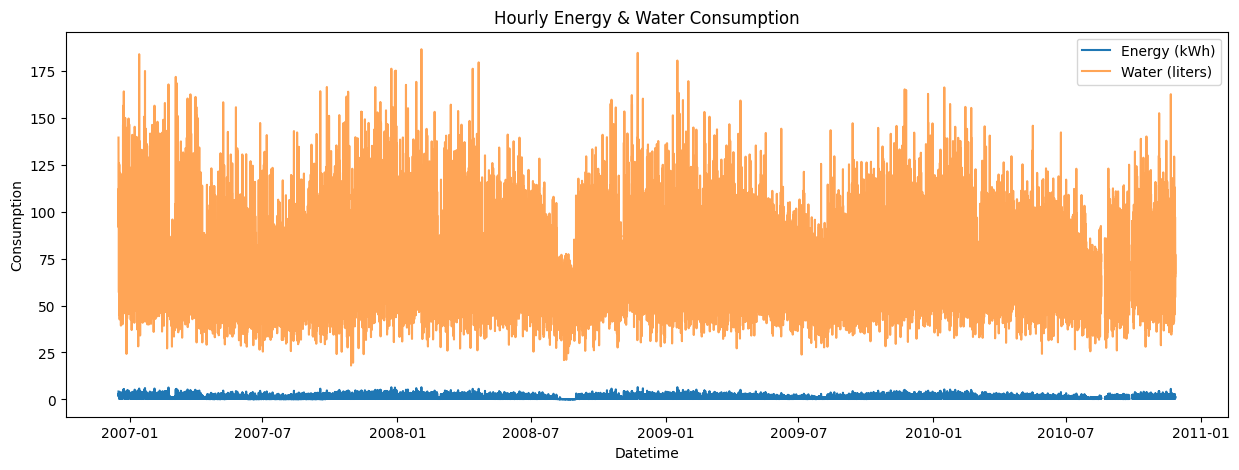

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
plt.plot(df_hourly['Global_active_power'], label='Energy (kWh)')
plt.plot(df_hourly['water_consumption_liters'], label='Water (liters)', alpha=0.7)
plt.title('Hourly Energy & Water Consumption')
plt.xlabel('Datetime')
plt.ylabel('Consumption')
plt.legend()
plt.show()

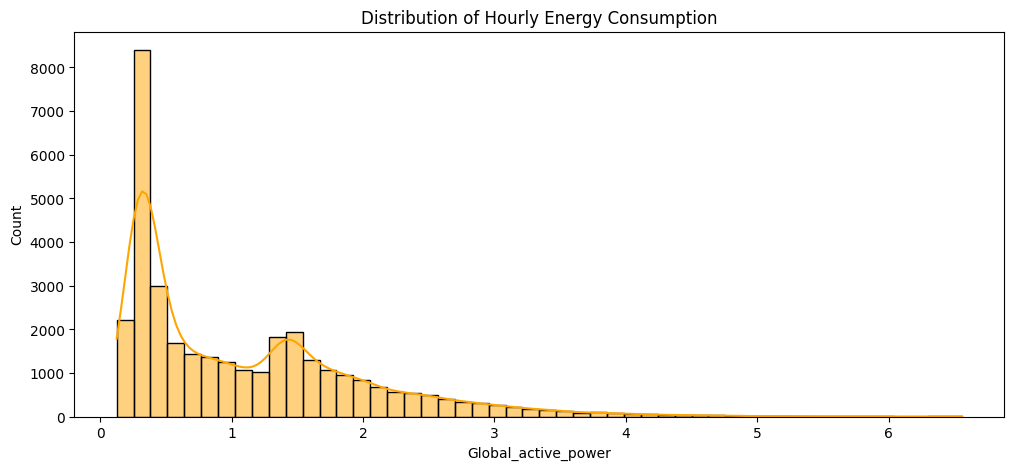

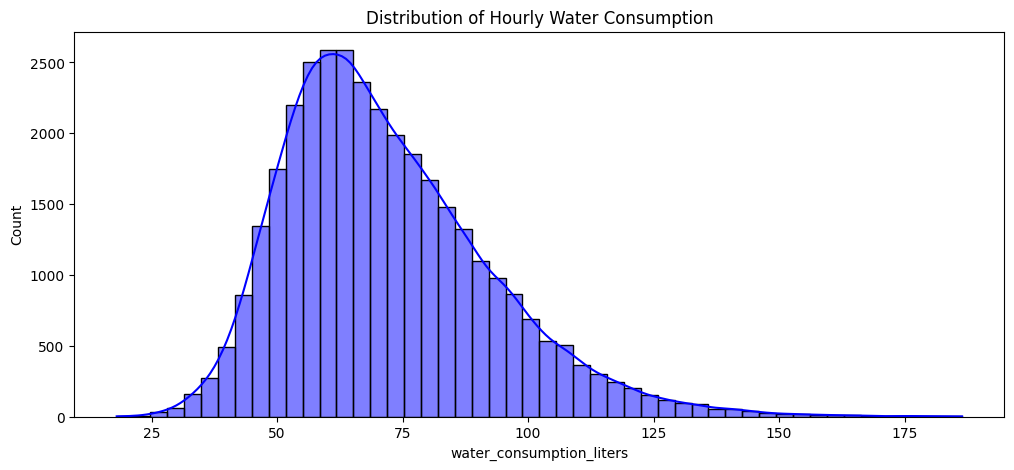

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df_hourly['Global_active_power'], bins=50, kde=True, color='orange')
plt.title('Distribution of Hourly Energy Consumption')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df_hourly['water_consumption_liters'], bins=50, kde=True, color='blue')
plt.title('Distribution of Hourly Water Consumption')
plt.show()

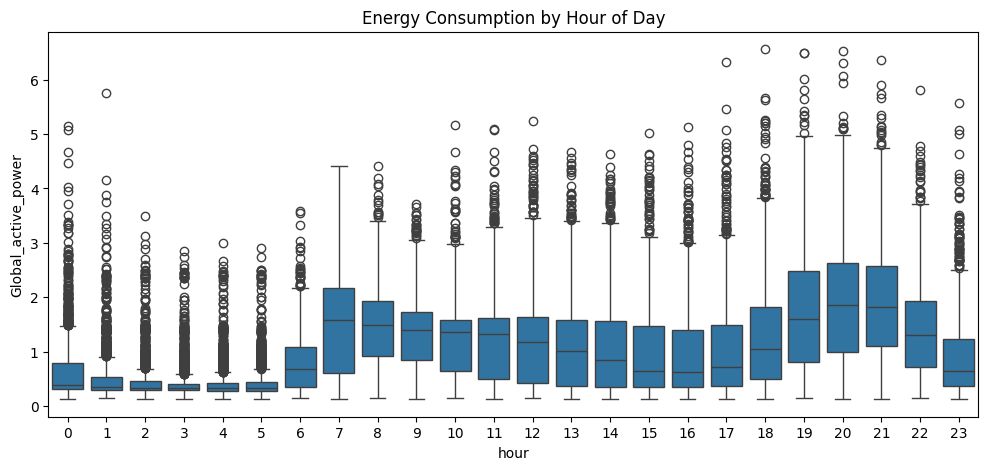

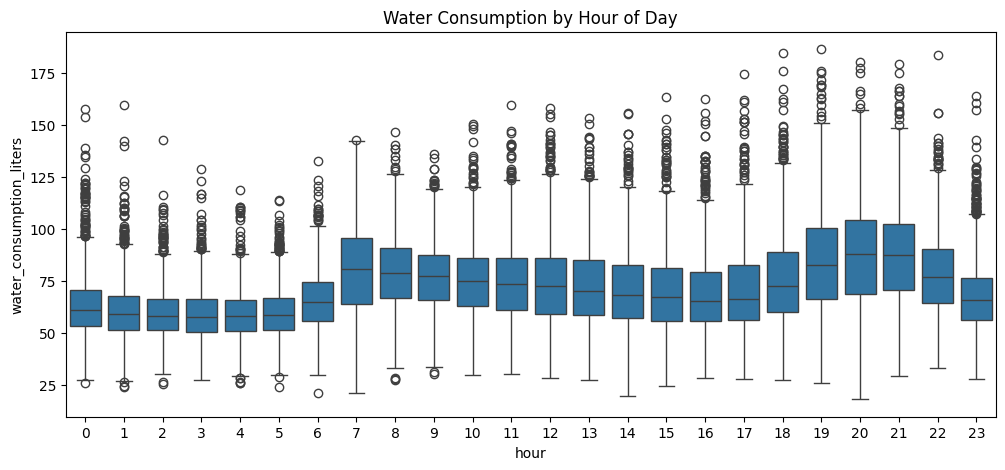

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='Global_active_power', data=df_hourly.reset_index())
plt.title('Energy Consumption by Hour of Day')
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='hour', y='water_consumption_liters', data=df_hourly.reset_index())
plt.title('Water Consumption by Hour of Day')
plt.show()

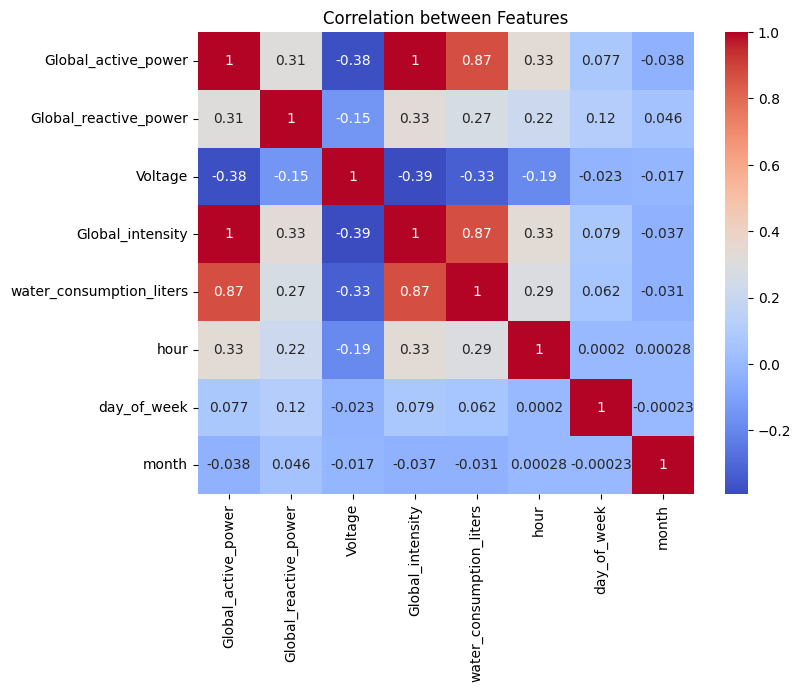

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_hourly.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

## ***Clustering for every household***

In [ ]:
from sklearn.preprocessing import StandardScaler

# features
features = ['Global_active_power', 'water_consumption_liters', 'Voltage', 'Global_intensity']

X = df_hourly[features]

# standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[ 3.48834736,  3.28929409, -2.06444614,  3.58506824],
       [ 2.83027586,  2.40545314, -2.08567945,  2.9197751 ],
       [ 2.57184769,  2.56214819, -2.53474464,  2.62793318],
       [ 2.4251612 ,  2.85995195, -2.25517574,  2.47181105],
       [ 2.18886597,  1.79848847, -1.22647991,  2.24028904]])

In [ ]:
# checking for NaN
print(X.isna().sum())

# drop NaN
X_clean = X.dropna()
df_hourly_clean = df_hourly.loc[X_clean.index]

Global_active_power         421
water_consumption_liters    421
Voltage                     421
Global_intensity            421
dtype: int64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_hourly_clean['cluster'] = clusters

print(df_hourly_clean['cluster'].value_counts())

cluster
1    18870
0    11491
2     3807
Name: count, dtype: int64


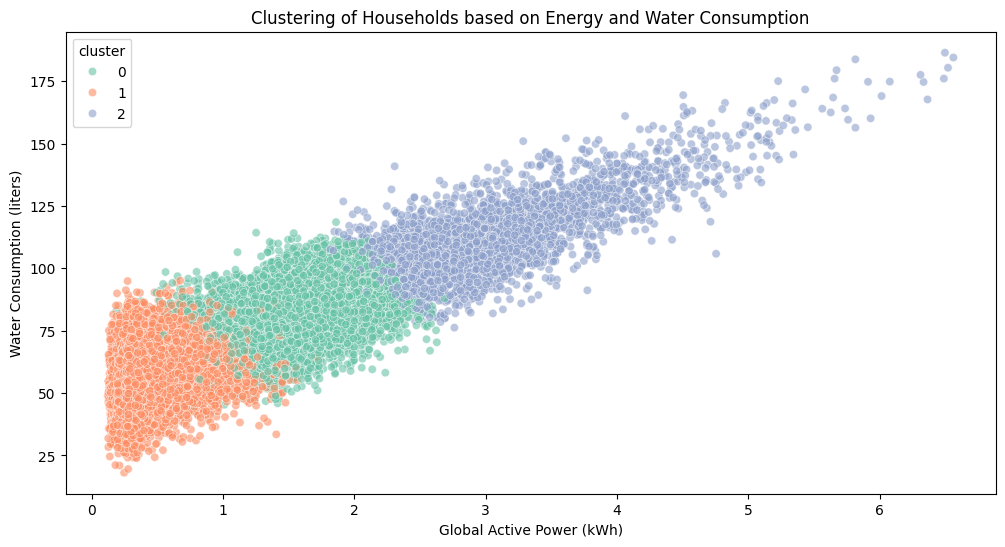

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.scatterplot(x='Global_active_power', y='water_consumption_liters', hue='cluster', data=df_hourly_clean, palette='Set2', alpha=0.6)
plt.title('Clustering of Households based on Energy and Water Consumption')
plt.xlabel('Global Active Power (kWh)')
plt.ylabel('Water Consumption (liters)')
plt.show()

In [ ]:
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.402


## ***Time Series Forecasting for energy & water consumption.***

In [ ]:
# df_hourly_clean with:
# 'Global_active_power', 'water_consumption_liters', 'cluster' + datetime index

df_forecast = df_hourly_clean[['Global_active_power', 'water_consumption_liters']].copy()

# Create lag features (past 4 hours)
for lag in range(1,5):
    df_forecast[f'energy_lag_{lag}'] = df_forecast['Global_active_power'].shift(lag)
    df_forecast[f'water_lag_{lag}'] = df_forecast['water_consumption_liters'].shift(lag)

# Drop initial NaN rows due to lag
df_forecast = df_forecast.dropna()
df_forecast

,Global_active_power,water_consumption_liters,energy_lag_1,water_lag_1,energy_lag_2,water_lag_2,energy_lag_3,water_lag_3,energy_lag_4,water_lag_4
datetime,,,,,,,,,,
2006-12-16 21:00:00,3.056467,108.787800,3.268567,130.601632,3.400233,124.481552,3.632200,121.261357,4.222889,139.424919
2006-12-16 22:00:00,2.200133,91.661297,3.056467,108.787800,3.268567,130.601632,3.400233,124.481552,3.632200,121.261357
2006-12-16 23:00:00,2.061600,107.024128,2.200133,91.661297,3.056467,108.787800,3.268567,130.601632,3.400233,124.481552
2006-12-17 00:00:00,1.882467,95.323681,2.061600,107.024128,2.200133,91.661297,3.056467,108.787800,3.268567,130.601632
2006-12-17 01:00:00,3.349400,112.293256,1.882467,95.323681,2.061600,107.024128,2.200133,91.661297,3.056467,108.787800
...,...,...,...,...,...,...,...,...,...,...
2010-11-26 17:00:00,1.725900,75.773921,1.067933,65.903618,0.876433,54.388132,1.407767,75.400905,1.612933,97.132249
2010-11-26 18:00:00,1.573467,75.712590,1.725900,75.773921,1.067933,65.903618,0.876433,54.388132,1.407767,75.400905
2010-11-26 19:00:00,1.659333,77.247131,1.573467,75.712590,1.725900,75.773921,1.067933,65.903618,0.876433,54.388132


In [ ]:
from sklearn.model_selection import train_test_split

X = df_forecast.drop(columns=['Global_active_power', 'water_consumption_liters'])
y_energy = df_forecast['Global_active_power']
y_water = df_forecast['water_consumption_liters']

X_train, X_test, y_energy_train, y_energy_test = train_test_split(X, y_energy, test_size=0.2, shuffle=False)
X_train, X_test, y_water_train, y_water_test = train_test_split(X, y_water, test_size=0.2, shuffle=False)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Energy model
model_energy = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_energy.fit(X_train, y_energy_train)
y_energy_pred = model_energy.predict(X_test)
rmse_energy = np.sqrt(mean_squared_error(y_energy_test, y_energy_pred))
print(f'Energy RMSE: {rmse_energy:.3f}')

# Water model
model_water = xgb.XGBRegressor(n_estimators=100, random_state=42)
model_water.fit(X_train, y_water_train)
y_water_pred = model_water.predict(X_test)
rmse_water = np.sqrt(mean_squared_error(y_water_test, y_water_pred))
print(f'Water RMSE: {rmse_water:.3f}')

Energy RMSE: 0.567
Water RMSE: 15.411


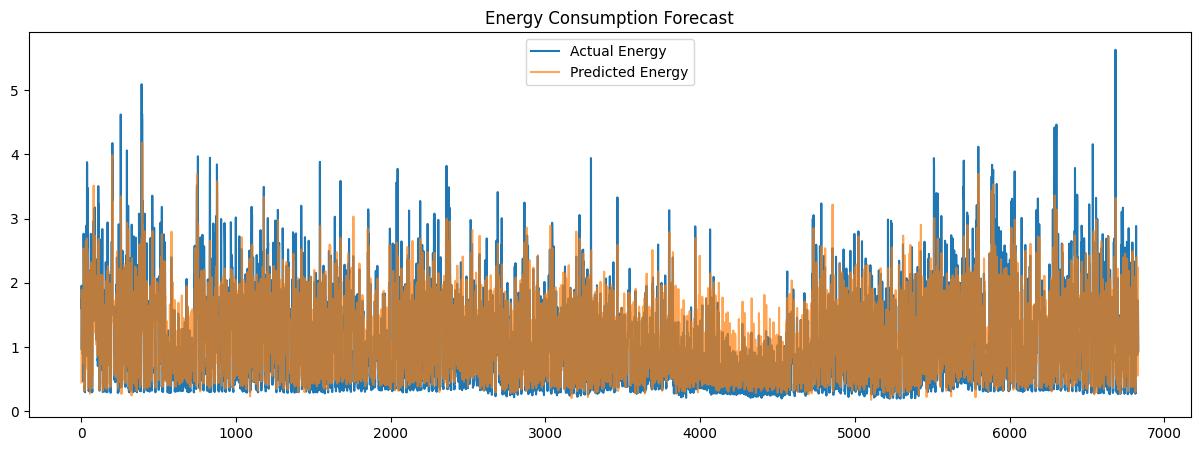

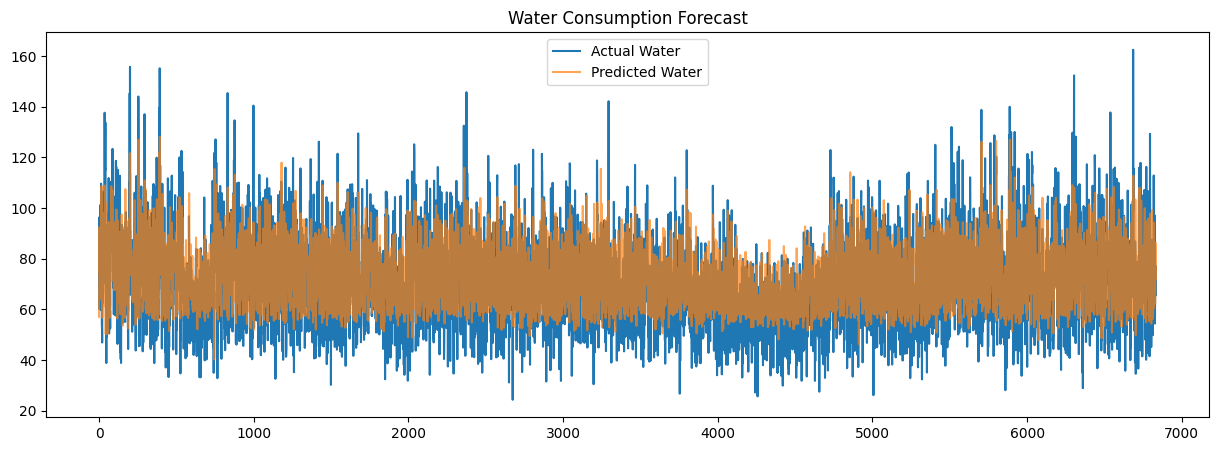

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(y_energy_test.values, label='Actual Energy')
plt.plot(y_energy_pred, label='Predicted Energy', alpha=0.7)
plt.title('Energy Consumption Forecast')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_water_test.values, label='Actual Water')
plt.plot(y_water_pred, label='Predicted Water', alpha=0.7)
plt.title('Water Consumption Forecast')
plt.legend()
plt.show()

## ***Feature Importance***

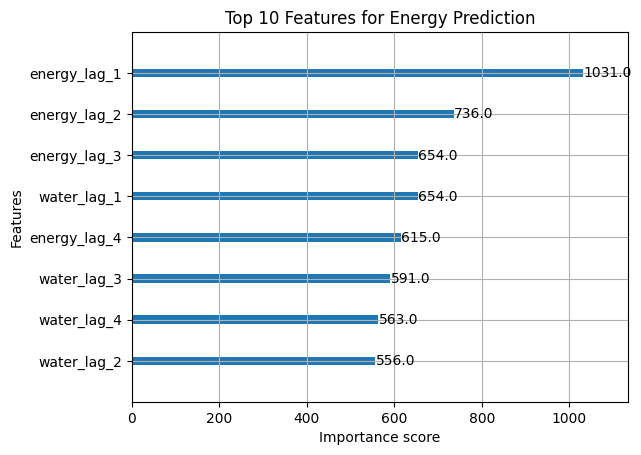

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# plot top 10 features
xgb.plot_importance(model_energy, max_num_features=10, importance_type='weight')
plt.title('Top 10 Features for Energy Prediction')
plt.show()

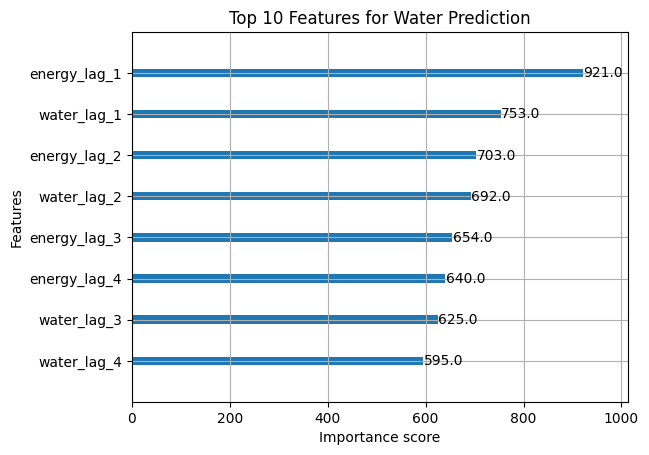

In [ ]:
xgb.plot_importance(model_water, max_num_features=10, importance_type='weight')
plt.title('Top 10 Features for Water Prediction')
plt.show()

## ***Smart Alerts Simulation***

In [ ]:
# Calculate thresholds (mean + std)
energy_threshold = df_hourly_clean['Global_active_power'].mean() + df_hourly_clean['Global_active_power'].std()
water_threshold = df_hourly_clean['water_consumption_liters'].mean() + df_hourly_clean['water_consumption_liters'].std()

# Create alert columns (true = alert, false = no alert)
df_hourly_clean['energy_alert'] = df_hourly_clean['Global_active_power'] > energy_threshold
df_hourly_clean['water_alert'] = df_hourly_clean['water_consumption_liters'] > water_threshold

# Check some examples
df_hourly_clean[['Global_active_power','energy_alert','water_consumption_liters','water_alert']].head(10)

,Global_active_power,energy_alert,water_consumption_liters,water_alert
datetime,,,,
2006-12-16 17:00:00,4.222889,True,139.424919,True
2006-12-16 18:00:00,3.632200,True,121.261357,True
2006-12-16 19:00:00,3.400233,True,124.481552,True
2006-12-16 20:00:00,3.268567,True,130.601632,True
2006-12-16 21:00:00,3.056467,True,108.787800,True
2006-12-16 22:00:00,2.200133,True,91.661297,False
2006-12-16 23:00:00,2.061600,True,107.024128,True
2006-12-17 00:00:00,1.882467,False,95.323681,True
2006-12-17 01:00:00,3.349400,True,112.293256,True


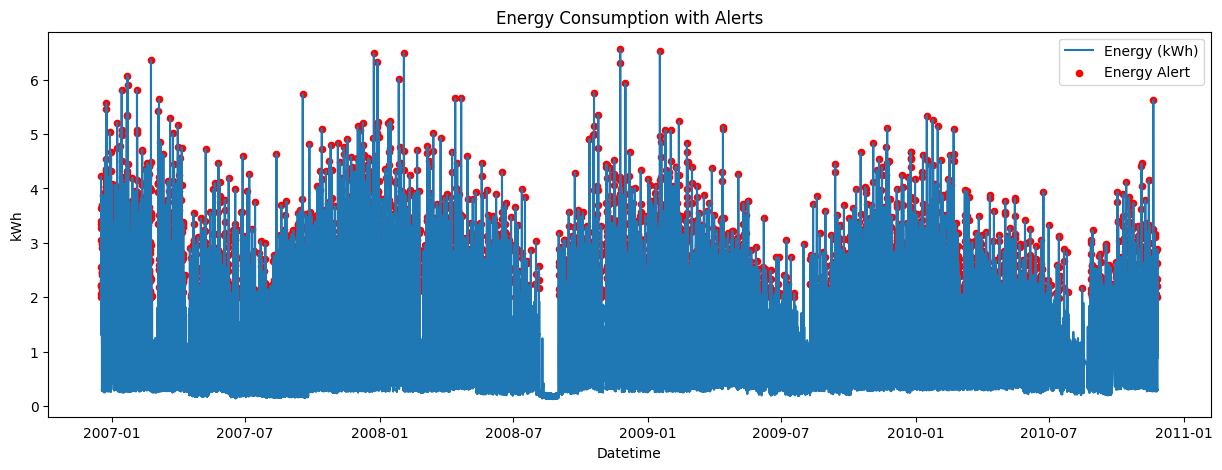

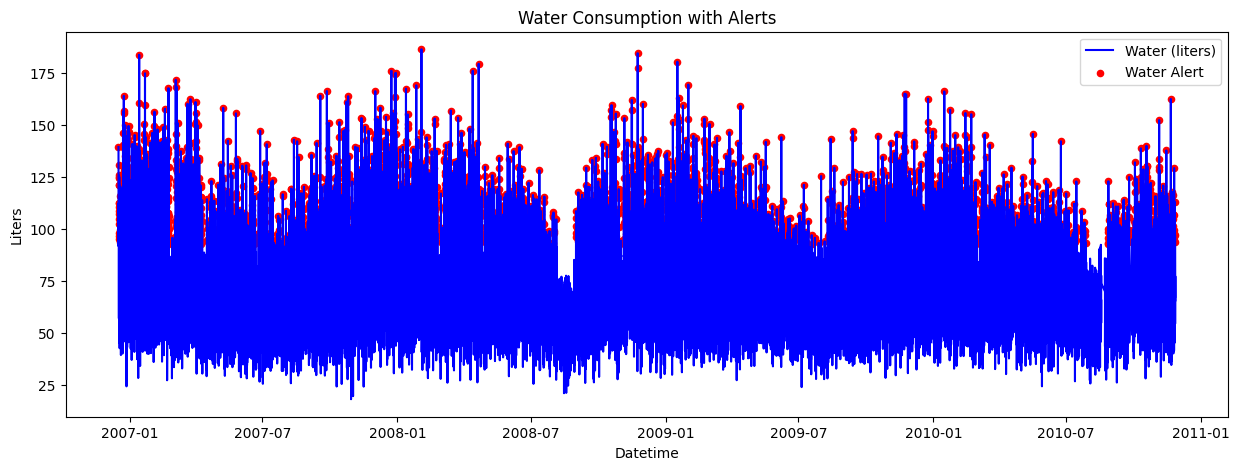

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_hourly_clean['Global_active_power'], label='Energy (kWh)')
plt.scatter(df_hourly_clean.index[df_hourly_clean['energy_alert']],
            df_hourly_clean['Global_active_power'][df_hourly_clean['energy_alert']],
            color='red', label='Energy Alert', s=20)
plt.title('Energy Consumption with Alerts')
plt.xlabel('Datetime')
plt.ylabel('kWh')
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
plt.plot(df_hourly_clean['water_consumption_liters'], label='Water (liters)', color='blue')
plt.scatter(df_hourly_clean.index[df_hourly_clean['water_alert']],
            df_hourly_clean['water_consumption_liters'][df_hourly_clean['water_alert']],
            color='red', label='Water Alert', s=20)
plt.title('Water Consumption with Alerts')
plt.xlabel('Datetime')
plt.ylabel('Liters')
plt.legend()
plt.show()


In [ ]:
alert_summary = df_hourly_clean.groupby('cluster')[['energy_alert','water_alert']].sum()
alert_summary

,energy_alert,water_alert
cluster,,
0,1444,1791
1,0,4
2,3778,3528
